## Linear Regression

In [2]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt


In [3]:
class LinearRegression:
    def fit(self,x_train,y_train):
        print("FIT")
        I=np.ones([len(x_train), 1])
        x_train =np.hstack([I,x_train])
        x_t_x = np.matmul(x_train.T,x_train) #x'x
        x_obr=linalg.inv(x_t_x)              #(x'x)^-1   
        b =np.matmul(x_obr,x_train.T)
        b= np.matmul(b,y_train)
        b_0 = b[0]
        self.b=b
        self.b_0=b_0
        print("", b_0, "   b0\n",b,"   b\n")
        
    def predict(self, x_val):
        print("\nPREDICT")
        I=np.ones([len(x_val), 1])
        x_train = np.hstack([I,x_val])
        y_pred = np.matmul(x_train, self.b) 
        print(y_pred)
        return y_pred
    
    def get_coeffs(self):
        print("\nCOEFFS")
        print("",self.b_0, "   b0 \n",self.b, "   b")
        return self.b_0,self.b
     
    def get_score(self,x_test,y_test):
        y_pred = self.predict(x_test)
        mse = (y_pred-y_test)**2
        mse= np.sum(mse)
        mse=mse/len(y_test)
        print("\nMSE ==  ",mse)
        return mse

b_1=2
b_0=10
x=np.arange(10)
y=b_1*x+b_0 +np.random.randn(10)
x=x.reshape(-1,1)
LR= LinearRegression()

LR.fit(x,y)

y_pred = LR.predict(x)

get = LR.get_score(x, y)

LR.get_coeffs()

FIT
 9.10585728435312    b0
 [9.10585728 2.18724991]    b


PREDICT
[ 9.10585728 11.29310719 13.4803571  15.66760701 17.85485691 20.04210682
 22.22935673 24.41660664 26.60385654 28.79110645]

PREDICT
[ 9.10585728 11.29310719 13.4803571  15.66760701 17.85485691 20.04210682
 22.22935673 24.41660664 26.60385654 28.79110645]

MSE ==   0.40294354145027017

COEFFS
 9.10585728435312    b0 
 [9.10585728 2.18724991]    b


(9.10585728435312, array([9.10585728, 2.18724991]))

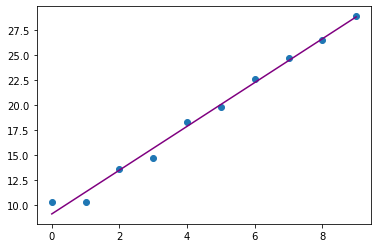

In [4]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='purple')

## Gradient Descent

In [7]:
class LinearRegressionGD(LinearRegression):
    def fit(self,x_train, y_train, alph, b_0, b_1, eps,max_iter):
        print("FIT")
        iteracii = 0
        self.b=[b_0,b_1]
        while True:
            y_pred= self.predict(x_train)
            d_mse_b1 = (-2/y_train.size)*np.sum(x_train*(y_train-y_pred))
            d_mse_b0 = (-2/y_train.size)*np.sum((y_train-y_pred))
            b_1_new = b_1 -alph*d_mse_b1
            b_0_new = b_0 -alph*d_mse_b0
            iteracii+=1
            
            if b_0-b_0_new < eps or b_1-b_1_new < eps or iteracii >max_iter:
                break
            b_0=b_0_new
            b_1=b_1_new
            self.b=[b_0,b_1]
        return b_0, b_1
        

b_1=1
b_0=2
alph = 0.001
eps = 0.00001
max_iter = 1000
x=np.arange(10)
y=b_1*x+b_0 +np.random.randn(10)
x=x.reshape(-1,1)
GD = LinearRegressionGD()
GD.fit(x,y,alph,b_0,b_1, eps, max_iter)
y_pred = GD.predict(x)
print(y)

FIT

PREDICT
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]

PREDICT
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
[ 2.60186812  2.50660347  5.34642768  5.48987132  6.20706043  6.0254648
  8.36563762  7.14475401 12.41997052 11.5943801 ]


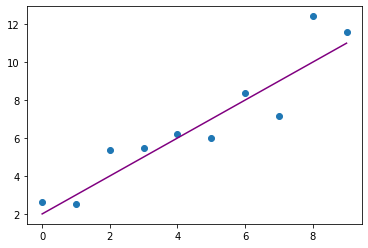

In [8]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='purple')

##  Ridge Regression

In [7]:
class LinearRegressionRR(LinearRegression):
    def fit(self,x_train,y_train, lambd):
        print("FIT")
        I=np.ones([len(x_train), 1])
        x_train =np.hstack([I,x_train])
        x_t_x = np.matmul(x_train.T,x_train) #x'x
        l = np.eye(len(x_t_x)-1,len(x_t_x)-1)
        zero = np.zeros([len(x_t_x)-1,1])
        l=np.hstack([zero,l])
        zero = np.append(zero, 0)          
        l=np.vstack([zero,l])                #l и умножение на альфа????
        print(l)
        b = x_t_x + lambd*l                        #x'x + l
        b=linalg.inv(b)                      #(x'x + l)^-1
        b =np.matmul(b,x_train.T)  #(x'x + l)^-1*x^-1    
        b= np.matmul(b,y_train) 
        b_0 = b[0]
        self.b=b
        self.b_0=b_0
        print(b_0,"\n",b)
b_1=2
b_0=10
lambd = 5
x=np.arange(10)
y=b_1*x+b_0 +np.random.randn(10)
x=x.reshape(-1,1)
RR = LinearRegressionRR()
RR.fit(x,y,lambd)
RR.get_score(x,y)
RR.get_coeffs()
y_pred = RR.predict(x)

FIT
[[0. 0.]
 [0. 1.]]
9.777570462129363 
 [9.77757046 2.05813813]

PREDICT
[ 9.77757046 11.8357086  13.89384673 15.95198486 18.01012299 20.06826113
 22.12639926 24.18453739 26.24267553 28.30081366]

MSE ==   1.3075552703227835

COEFFS
 9.777570462129363    b0 
 [9.77757046 2.05813813]    b

PREDICT
[ 9.77757046 11.8357086  13.89384673 15.95198486 18.01012299 20.06826113
 22.12639926 24.18453739 26.24267553 28.30081366]


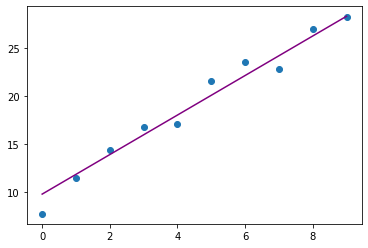

In [8]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='purple')